# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 1](#scrollTo=1J4h6kTngjn5&line=1&uniqifier=1) \\
>>

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [2]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# Ejercicio 1

Para realizar el ejercicio cargamos los datos de *Especies* en STARWARS SWAPI y las librerías principales.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('C:/Users/Rodri/mbdds_fc20/Python/www/' + x + '_df.pkl') for x in entidades}

# Datos principales
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

people_df

,height,mass,birth_year,gender,homeworld
name,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/
Owen Lars,178.0,120.0,52.0,male,http://swapi.dev/api/planets/1/
Beru Whitesun lars,165.0,75.0,47.0,female,http://swapi.dev/api/planets/1/
Biggs Darklighter,183.0,84.0,24.0,male,http://swapi.dev/api/planets/1/
Obi-Wan Kenobi,182.0,77.0,57.0,male,http://swapi.dev/api/planets/20/


## Ejercicio 1.1. 

Construye un gráfico de dispersión de los personajes donde se visualice: la altura (height), el peso (mass), la edad en años BBY (birth_year) y el género (gender). Para ello utiliza la función `sns.scatterplot()` de la librería seaborn. Aprovecha todos los parámetros: `x`, `y`, `size`, `hue` y `style` (consulta la ayuda de la función [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

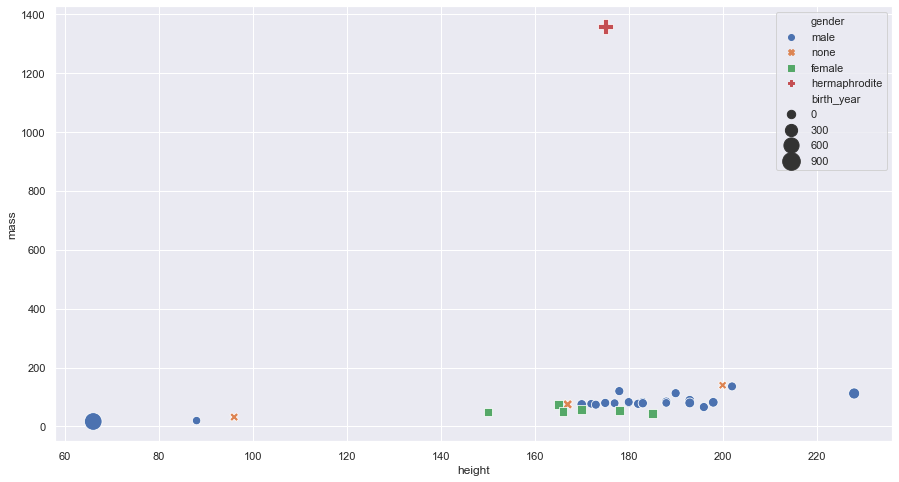

In [4]:
# Solución:

# Aquí configuro el tamaño del gráfico, ya que de lo contrario saldría muy pequeño
sns.set(rc = {'figure.figsize':(15,8)})

''' x, y, hue y style son variables propias del data frame. Con el parametro sizes agrando el tamaño de los scatter points, ya 
que de lo contrario se hacían muy dificilmente diferenciables. '''

sns.scatterplot(x = "height",
                y= "mass",
                size = "birth_year",
                hue= "gender", 
                style = "gender",
                sizes=(70, 310),
                data = people_df
               )



## Ejercicio 1.2.

Sobre el gráfico del ejercicio 1.1:

- Pon título al gráfico y a los ejes x e y. 
- Modifica los límites del eje y para que aparezcan sólo personajes de menos de 150 Kg de peso.
- Sitúa en el gráfico los nombres de "Darth Vader" y "Anakin Skywalker". ¿Cómo es posible tengan un peso y altura tan distintos si eran la misma persona?

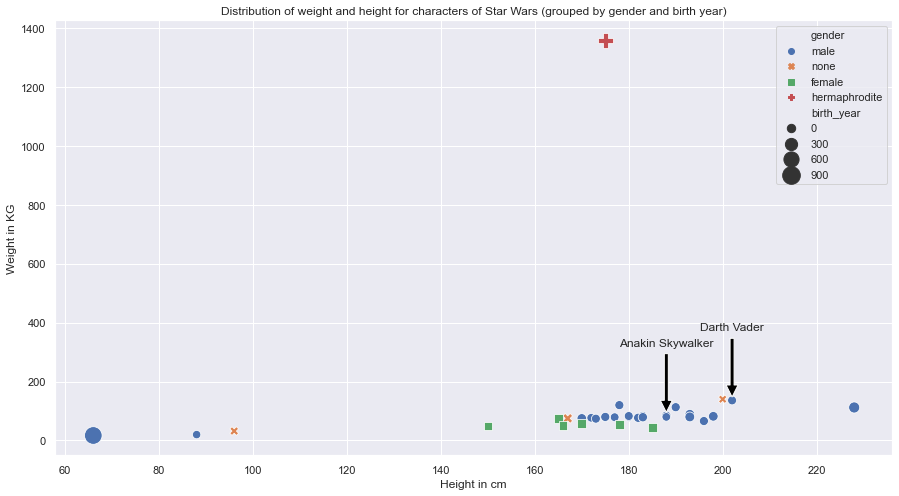

In [5]:
# Solución:

sns.scatterplot(x = "height",
                y= "mass",
                size = "birth_year",
                hue= "gender", 
                style = "gender",
                sizes=(70, 310),
                data = people_df
               )

#Cambio de nombres de los labels X, Y como también del título del gráfico
plt.xlabel("Height in cm")
plt.ylabel("Weight in KG")
plt.title("Distribution of weight and height for characters of Star Wars (grouped by gender and birth year)")


# En este caso, se aplica el filtro a la hora de generar la iteración, para luego alpicar las anotaciones hacia ambos
# componentes
for x1,y1,n1 in zip(people_df.height[(people_df.index == "Darth Vader") | (people_df.index == "Anakin Skywalker")],
                    people_df.mass[(people_df.index == "Darth Vader") | (people_df.index == "Anakin Skywalker")], 
                    people_df.index[(people_df.index == "Darth Vader") | (people_df.index == "Anakin Skywalker")]):

        plt.annotate(
            n1,(x1, y1)
            , arrowprops=dict(facecolor='black', shrink=0.05)
            , textcoords="offset points"
            , xytext=(0,70)
            , ha='center'
        )
    
# Se tomó la opción anterior para evitar una ineficiencia en el cómputo. La otra alternativa explorada fue hacer una iteración
# Sobre cada item del DF y luego aplicar el filtro lógico, lo cual tendría menor eficiencia.

    
#En este caso se hace una iteración por los ejes x, y como también por el índice del DF (que es el que contiene los nombres de 
#los personajes)
# Se usa zip para generar una tupla única por cada iteración

# for x1,y1,n1 in zip(people_df.height, people_df.mass, people_df.index):


#     if n1 == "Darth Vader" or n1 == "Anakin Skywalker":
#         plt.annotate(
#             n1,(x1, y1)
#             , arrowprops=dict(facecolor='black', shrink=0.05)
#             , textcoords="offset points"
#             , xytext=(0,70)
#             , ha='center'
#         )


Se puede ver en este caso que Darth Vader tiene tanto mayor peso como mayor altura que en su pasado como Anakin.
Esto puede deberse a su mayor entrenamiento físico, como asi también su crecimiento como lord Sith.


## Ejercicio 1.3.

Utiliza las *list comprehension* para calcular el cuadrado de los valores positivos de la siguiente lista:

Muestra el resultado por pantalla.

In [6]:
val = [5, 6, -1, 2, -3, -7, 9, 1]

In [7]:
# Solución:
val_square = [x**2 for x in val if x > 0]

print(val_square)

[25, 36, 4, 81, 1]


## Ejercicio 1.4.

Construye un diccionario donde se identifique, mediante claves y valores, las siguientes características del personaje Yoda: "nombre", "altura", "peso", "edad" y "genero". Utiliza los datos de people_df.

Muestra el diccionario por pantalla.

In [8]:
# Solución:

#Creo el diccionario original solamente con el nombre de yoda. En el caso del dataframe es el nombre del índice
yoda = {"name" : "Yoda"} 
#En yoda_media guardo el diccionario que creo a partir de obtener los valores referentes al índice "Yoda"
yoda_media = dict(people_df.loc["Yoda"])
#Elimino el campo homeworld de yoda_media ya que no se solicita
yoda_media.pop("homeworld")
#Fusiono ambos diccionarios para obtener el resultado final.
yoda = {**yoda, **yoda_media}
print(yoda)

{'name': 'Yoda', 'height': 66.0, 'mass': 17.0, 'birth_year': 896.0, 'gender': 'male'}


## Ejercicio 1.5.

Calcula, a partir de los vectores numpy de altura y peso, definidos a continuación, el [índice de masa corporal (IMC)](https://es.wikipedia.org/wiki/%C3%8Dndice_de_masa_corporal) de los personajes de star wars contenidos en people_df: 

$IMC = \frac{peso}{altura^{2}}$ donde altura está en metros y el peso en kg.

Muestra los datos por pantalla.

In [9]:
# Solución:

imc = np.array(people_df["mass"]) / (np.array(people_df["height"])/100)**2
print(imc)


[ 26.02758248  26.89232314  34.72222222  33.33006568  21.77777778
  37.87400581  27.54820937  25.08286303  23.24598478  23.76641014
  21.5450908   24.69135802  24.72518293 443.42857143  26.64359862
  39.02662994  25.95155709  23.35095106  35.          31.30193906
  25.21625331  25.79591837  25.61728395  25.82644628  23.89325888
  13.14828342  17.18034152  26.12244898  17.35891933  23.76641014
  20.91623304  22.63467632  19.44636678  18.14486863  21.47708663
  23.58983547]


## Ejercicio 1.6.

A partir del IMC que has calculado en el ejercicio 1.5. Construye un panel con dos histogramas:

- Un histograma con toda la muestra
- Un histograma seleccionando los valores con un IMC inferior a 100.

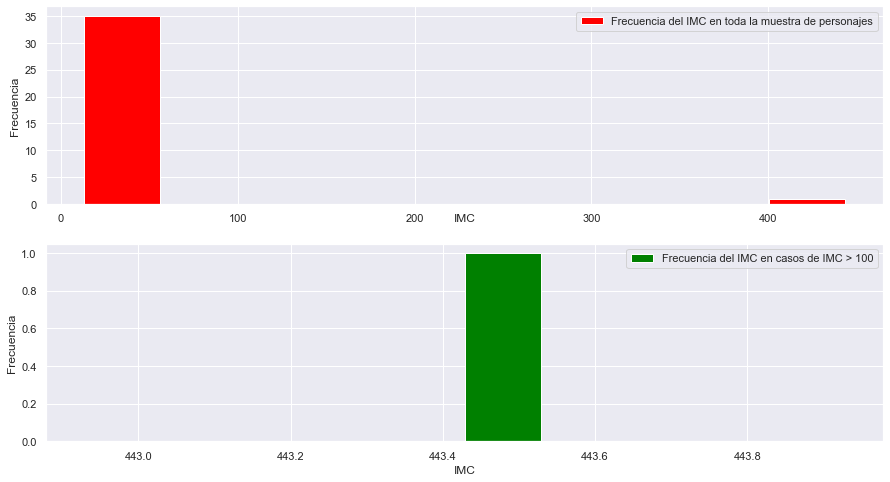

In [10]:
# Solución:
plt.figure()

plt.subplot(2,1,1)
plt.hist(imc, color= "red", label = "Frecuencia del IMC en toda la muestra de personajes")
plt.xlabel("IMC", labelpad = -10)
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(2,1,2)
plt.hist(imc[imc > 100], color="green", label = "Frecuencia del IMC en casos de IMC > 100")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")
plt.legend()


## Ejercicio 1.7.

A partir del vector 1 y 2 que se definen a continuación contesta las siguientes preguntas:

- Calcula el shape, ndim, size del vector1 y vector2
- Explica cual es la diferencia entre vector1 y vector2 a partir de los que hayas observado

In [11]:
vector1 = np.hstack([people_df["height"],people_df["mass"]])
vector2 = np.vstack([people_df["height"],people_df["mass"]])

In [12]:
# Solución:

print(" Información referente al vector 1 \n Shape: {} \n ndim: {} \n size: {}".
      format(vector1.shape, vector1.ndim, vector1.shape))

print("-"*40)

print(" Información referente al vector 2 \n Shape: {} \n ndim: {} \n size: {}".
      format(vector2.shape, vector2.ndim, vector2.shape))


 Información referente al vector 1 
 Shape: (72,) 
 ndim: 1 
 size: (72,)
----------------------------------------
 Información referente al vector 2 
 Shape: (2, 36) 
 ndim: 2 
 size: (2, 36)


La diferencia entre ambas formas de apilar surge del hecho de que el hstack junta ambos arrays en forma de fila (horizontal). Esto quiere decir que los elementos se concatenan de la siguiente forma.

Ej.: array1 = [1,2]
     array2 = [3,4]
     vstack = [1,2,3,4]
     
Por otro lado, vstack concatena de forma vertical.

Ej.: array1 = [1,2]
     array2 = [3,4]
     vstack = [[1,3],[2,4]]
     
Dado lo anterior, ese es el motivo por el cual las dimensiones cambian a 2 en el caso del vector 2 y el shape o cantidad de elementos se divide entre dos. Cada elemento del array es un array de dos elementos.


## Ejercicio 1.8.

Crea una copia de people_df llamada personajes_df y renombra las columnas con su traducción al castellano. 

Muestra los 5 primeros registros del nuevo data frame con `.head()`.

In [13]:
# Solución:

personajes_df = people_df.copy()
personajes_df.index.name = "nombre"
personajes_df.columns =["altura","peso","anio_nacimiento","genero","planeta de origen"]

personajes_df.head(5)

,altura,peso,anio_nacimiento,genero,planeta de origen
nombre,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/


## Ejercicio 1.9.

Haz el mismo cálculo de IMC que has hecho en 1.5. pero directamente sobre el objeto personajes_df.

Ordena el data frame de mayor a menor IMC y muestra el nombre e IMC de los personajes con IMC por encima de 30.

> ¿Sabias que IMC por encima de 30 se considera obeso?


In [14]:
# Solución:

personajes_df["IMC"] = personajes_df["peso"]/ (personajes_df["altura"]/100)**2

personajes_df.\
    sort_values("IMC", ascending = False).\
    loc[ personajes_df.IMC > 30, ["IMC"]]


,IMC
nombre,
Jabba Desilijic Tiure,443.428571
Yoda,39.026630
Owen Lars,37.874006
IG-88,35.000000
R2-D2,34.722222
Darth Vader,33.330066
Bossk,31.301939


## Ejercicio 1.10.

Inserta un valor faltante en los valores de IMC que sean superiores a 100 y dibuja el histograma del IMC transformado con `.plot.hist()`.

C:\Users\Rodri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rodri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


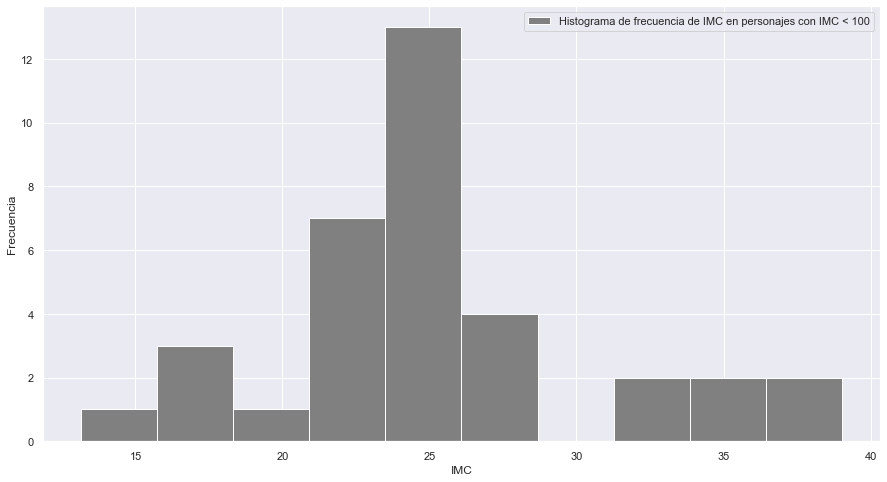

In [15]:
# Solución:

personajes_df[personajes_df.IMC > 100] = np.nan

plt.hist(personajes_df.IMC, color= "gray", label= "Histograma de frecuencia de IMC en personajes con IMC < 100")
plt.ylabel("Frecuencia")
plt.xlabel("IMC")
plt.legend()
